# W02 - Class Practice
# Data Mining (Kamis)
W02 - 0706022310028 - Jevon Ivander K

# Part A - Data Preprocessing

## 1. Load the dataset into Python (use Pandas).

In [214]:
import pandas as pd

# Download the CSV file from the URL
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/jabodetabek_house_price.csv"
df = pd.read_csv(url, sep=',')

Melakukan load dataset menggunakan pandas agar lebih memudahkan. Kebetulan dataset dipisahkan oleh separator koma jadi boleh jg utk coding tanpa keterangan separator krn defaultnya koma. Link dataset diambil dari ce minoq.

## 2. Inspect the dataset:
- Display the first 5 rows.
- Show dataset info, descriptive statistics, and key findings.

In [215]:
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


- Output tersebut menunjukkan struktur data awal, Menunjukkan struktur data awal, termasuk kolom seperti url, price_in_rp, title, address, district, city, lat, long, facilities, dan informasi properti lainnya. Terlihat ada data numerik dan data teks. Dataset berisi 27 kolom yang mencakup informasi properti di Jabodetabek (harga, lokasi, fasilitas, spesifikasi bangunan, dll). Beberapa kolom mengandung nilai kosong (NaN), misalnya year_built dan furnishing perlu penanganan missing values.

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

- Dari hasil dapat dilihat terdapat 3553 entri dan 27 kolom pada dataset yang terbaca.
- Total tipe data: 14 numerik float64 dan 13 object
- Beberapa kolom memiliki nilai non-null yang kurang dari jumlah total entri (3553), menunjukkan terdapat missing values. Kolom dengan missing values terbanyak salah satunya building_orientation.
Tipe ada 2 seperti float64 untuk nilai numerik dan object untuk teks. Kolom seperti price_in_rp, lat, long, bedrooms, bathrooms, land_size_m2, building_size_m2, carports, maid_bedrooms, maid_bathrooms, floors, building_age, year_built, dan garages bertipe numerik. Kolom lain seperti url, title, address, district, city, facilities, property_type, ads_id, certificate, electricity, property_condition, building_orientation, dan furnishing bertipe object.
- Kolom electricity bertipe object padahal isinya numerik dengan satuan (contoh: "2200 mah", "3500 mah") butuh preprocessing dengan menghapus “mah” dan konversi ke integer.

In [217]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000




- price_in_rp: Rentang harga sangat lebar, dari 42 juta hingga 580 miliar Rupiah. Nilai rata-rata (mean) sangat tinggi (4.19 miliar), kemungkinan dipengaruhi oleh beberapa harga yang sangat tinggi bisa jadi outliers. Median (1.5 miliar) mungkin lebih mencerminkan harga sebenarnya.
- Latitude berkisar dari -6.89 sampai -6.10  masih konsisten area Jabodetabek.
- Longitude dari 106.40 sampai 109.77.
- bedrooms dan bathrooms: Rata-rata sekitar 3 kamar tidur dan 2-3 kamar mandi. Ada nilai maksimum yang sangat tinggi (99), ini bisa jadi outliers.
- land_size_m2 dan building_size_m2: Rata-rata luas tanah sekitar 204 m2 dan luas bangunan sekitar 186 m1. Ada properti dengan ukuran tanah dan bangunan yang sangat besar (maksimum 8000 m² dan 6000 m²) kemungkinan properti memang sangat besar.
- carports dan garages: Sebagian besar properti memiliki 1-2 carport/garasi. Ada yang punya 15 carport bahkan 50 garages kemungkinan outliers.
- floors: Rata-rata properti memiliki 1-2 lantai.
- building_age dan year_built: mean umur bangunan sekitar 3.9 tahun, dengan nilai maksimum 152 tahun. Tahun pembangunan bervariasi dari 1870 hingga 2052 (tidak masuk akal).

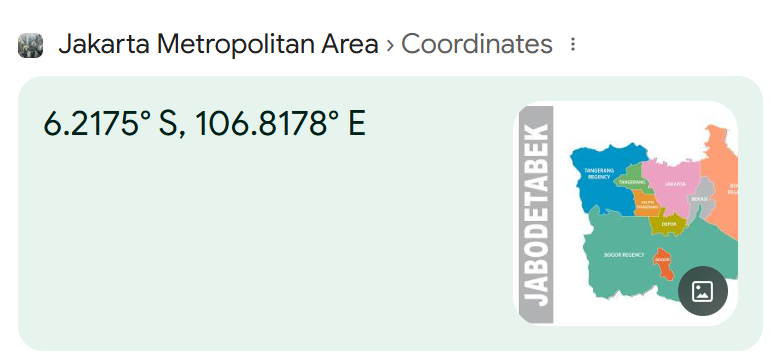

In [218]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'url':
['https://www.rumah123.com/properti/bekasi/hos11360272/#qid~213b5619-a399-47b3-bfcf-faaef6b542d5'
 'https://www.rumah123.com/properti/bekasi/hos10680347/#qid~748f5d2d-8d3a-4a4e-a1b4-37c7be7ffc25'
 'https://www.rumah123.com/properti/bekasi/hos10685867/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93'
 ...
 'https://www.rumah123.com/properti/tangerang/hos11359594/#qid~0d9492e8-7326-465d-85ee-e54559fedc26'
 'https://www.rumah123.com/properti/tangerang/hos11359313/#qid~5d5b05f9-ab0d-4774-ae61-bddd6e38b7f0'
 'https://www.rumah123.com/properti/tangerang/hos11358964/#qid~5d5b05f9-ab0d-4774-ae61-bddd6e38b7f0']
--------------------
Unique values for column 'price_in_rp':
[2.99e+09 1.27e+09 1.95e+09 3.30e+09 4.50e+09 2.70e+09 2.35e+09 2.90e+09
 2.55e+09 9.52e+08 1.80e+09 2.50e+09 5.36e+09 2.25e+09 2.45e+09 1.25e+08
 1.98e+09 7.64e+08 2.00e+09 4.80e+08 1.90e+09 3.00e+08 5.27e+09 2.80e+09
 2.71e+09 5.00e+08 4.39e+08 8.00e+08 8.50e+08 7.00e+08 4.95e+09 1.30e+09
 1.20e+09 2.

- Kolom url dan ads_id sepertinya adalah pengenal unik untuk setiap rumah. Ada beberapa iklan yang hilang ID-nya. Informasi berbeda-beda setiap row jadi susah untuk dijadikan knowlegde, lebih baik dihilangkan saja.
- Kolom title juga sangat beragam dan berupa teks jadi susah dijadikan knowlegde.
- price_in_rp sangat beragam, dari murah sampai mahal.
- Kolom address, district, city, lat, dan long memberi tahu kita di mana saja properti ini berada di Jabodetabek.
- Kolom facilities berisi daftar fasilitas yang berbeda-beda di setiap rumah.
- Tipe properti mayoritas adalah 'rumah'.
- Spesifikasi Bangunan pada ada data yang mencurigakan (misalnya 99 kamar tidur/mandi) yang perlu dicek.
- Listrik: Kolom electricity masih dalam format teks ("mah"), perlu diubah jadi angka.
- property_condition dan furnishing ada datanya yang kebalik, di property_condition ada 'semi furnished' 'unfurnished' sedangkan furnishing ada 'baru'
- Banyak kolom lain yang datanya juga hilang dan perlu dihandling.

In [219]:
# Drop the 'url', 'ads_id', 'title', and 'address' columns
df = df.drop(['url', 'ads_id', 'title', 'address', 'year_built', 'property_type'], axis=1)

# Display
df.head()

,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,...,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,building_orientation,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",4.0,4.0,239.0,272.0,...,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,bagus,NaN,0.0,unfurnished
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,...,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,bagus,NaN,0.0,NaN
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",3.0,3.0,119.0,131.0,...,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,bagus,NaN,1.0,unfurnished
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",3.0,3.0,180.0,174.0,...,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.0,bagus sekali,utara,2.0,unfurnished
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",4.0,3.0,328.0,196.0,...,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.0,bagus,utara,1.0,unfurnished


Beberapa kolom didrop dengan alasan
- url: hanya berisi link unik ke halaman, tidak punya nilai knowlegde selain sebagai ID.
- ads_id: ID iklan yang unik per properti, tidak relevan untuk analisis harga atau fitur.
- title: berupa teks promosi dari penjual/agen, terlalu banyak variasi teks dan sulit dipakai untuk analisis.
- address: alamat informasinya tidak konsisten dan sudah tercakup dalam kolom district dan city, jadi redundan.
- year_built: sifatnya mirip dengan building_age jadi menghindari kolom yang memiliki fungsi sama, lebih gampang untuk dikonsep dan relevan, serta memiliki persentase missing values yang tinggi dan mengandung nilai yang tidak valid (tahun di masa depan).
- property_type: jenisnya mayoritas rumah dan hanya ada sangat sendikit data NaN, jadi karena informasi yang diberikan sama kolom tidak berguna.

In [220]:
mask = df["property_condition"].isin(["semi furnished", "unfurnished"])

# Store the incorrect values
temp = df.loc[mask, "property_condition"]

# Swap: fill property_condition with furnishing
df.loc[mask, "property_condition"] = df.loc[mask, "furnishing"]

# Fill furnishing with the values that were originally incorrect
df.loc[mask, "furnishing"] = temp

In [221]:
# 1. Reload Data
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/jabodetabek_house_price.csv"
df_original = pd.read_csv(url, sep=',')

# Drop the same columns as before to match the state before the swap code
df_original = df_original.drop(['url', 'ads_id', 'title', 'address', 'year_built', 'property_type'], axis=1)

# 2. Create a Copy
df_modified = df_original.copy()

# Identify the rows where the swap will occur
mask_compare = df_modified["property_condition"].isin(["semi furnished", "unfurnished"])

# 3. Perform Swap on the copied DataFrame
temp_compare = df_modified.loc[mask_compare, "property_condition"]
df_modified.loc[mask_compare, "property_condition"] = df_modified.loc[mask_compare, "furnishing"]
df_modified.loc[mask_compare, "furnishing"] = temp_compare

# 4. Compare Data
# Select the relevant columns and rows for comparison
comparison_before = df_original.loc[mask_compare, ['property_condition', 'furnishing']]
comparison_after = df_modified.loc[mask_compare, ['property_condition', 'furnishing']]

# Rename columns for clarity in the comparison table
comparison_before = comparison_before.rename(columns={'property_condition': 'property_condition_before',
                                                       'furnishing': 'furnishing_before'})
comparison_after = comparison_after.rename(columns={'property_condition': 'property_condition_after',
                                                      'furnishing': 'furnishing_after'})

# Concatenate the before and after DataFrames
comparison_table = pd.concat([comparison_before, comparison_after], axis=1)

# 5. Display Comparison Table
print("Comparison of 'property_condition' and 'furnishing' before and after swap:")
display(comparison_table)

Comparison of 'property_condition' and 'furnishing' before and after swap:


,property_condition_before,furnishing_before,property_condition_after,furnishing_after
274,semi furnished,baru,baru,semi furnished
275,semi furnished,baru,baru,semi furnished
276,semi furnished,baru,baru,semi furnished
1504,unfurnished,baru,baru,unfurnished
1505,unfurnished,baru,baru,unfurnished
1506,unfurnished,baru,baru,unfurnished
1554,unfurnished,baru,baru,unfurnished
1555,unfurnished,baru,baru,unfurnished
1556,unfurnished,baru,baru,unfurnished
1557,unfurnished,baru,baru,unfurnished


Pada dataset, ditemukan anomali di mana nilai seperti semi furnished dan unfurnished muncul di kolom property_condition. Padahal, nilai tersebut seharusnya masuk ke kolom furnishing. Untuk memperbaikinya, dilakukan swap: data yang salah dipindahkan ke kolom furnishing, lalu kolom property_condition diisi ulang dengan nilai yang sesuai. sedangkan furnishing ada 'baru'dimana ittu adalah data untuk kolom property_condition.

## 3. Handle missing values:
- Identify missing values.
- Decide and apply one strategy.


In [222]:
# Calculate null values and percentage
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Create a DataFrame for columns with null values
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Filter for columns with null values
null_df = null_df[null_df['Null Count'] > 0]


# Format the percentage with two decimal places and % symbol
null_df['Null Percentage'] = null_df['Null Percentage'].map('{:.2f}%'.format)


null_df

,Null Count,Null Percentage
bedrooms,34,0.96%
bathrooms,29,0.82%
land_size_m2,2,0.06%
building_size_m2,2,0.06%
certificate,141,3.97%
floors,6,0.17%
building_age,1445,40.67%
property_condition,246,6.92%
building_orientation,1647,46.36%
furnishing,387,10.89%


- Building_orientation memiliki jumlah missing values terbanyak (1647), diikuti oleh building_age dan year_built (keduanya 1445), dan furnishing (387).
- Kolom lain seperti certificate, property_condition, bedrooms, bathrooms, ads_id, floors, property_type, land_size_m2, dan building_size_m2 juga memiliki missing values, tetapi dalam jumlah yang jauh lebih sedikit.
- Kolom url, price_in_rp, title, address, district, city, lat, long, facilities, carports, electricity, maid_bedrooms, maid_bathrooms, dan garages tidak memiliki missing values.

/tmp/ipython-input-1899111875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Null Count', y=null_df.index, data=null_df, orient='h', palette='rainbow')


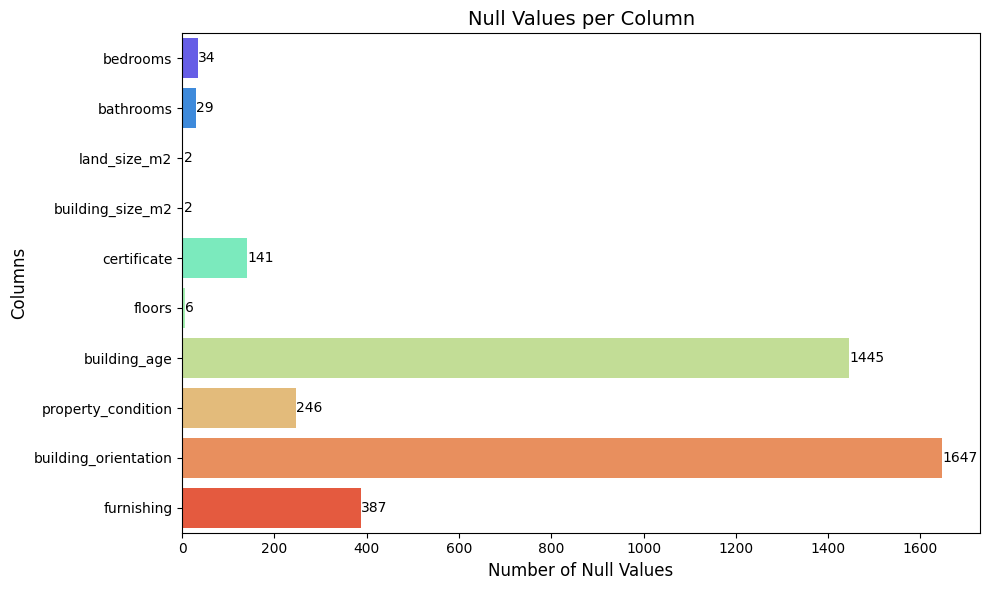

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Null Count', y=null_df.index, data=null_df, orient='h', palette='rainbow')
plt.xlabel('Number of Null Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.title('Null Values per Column', fontsize=14)

# Add labels to the bars
for i, v in enumerate(null_df['Null Count']):
    plt.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

**KOLOM: bedrooms**

In [224]:
# Calculate the median of the 'bedrooms' column
bedrooms_median = df['bedrooms'].median()

# Fill missing values in 'bedrooms' with the median
df['bedrooms'].fillna(bedrooms_median, inplace=True)

# Verify if there are any missing values left in 'bedrooms'
print(f"Missing values in 'bedrooms' after imputation: {df['bedrooms'].isnull().sum()}")

bedrooms_median

Missing values in 'bedrooms' after imputation: 0


/tmp/ipython-input-3787493482.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(bedrooms_median, inplace=True)


3.0

Kolom bedrooms berisi jumlah kamar tidur dengan 34 missing values (0.96%) hanya sebagian kecil. Nilainya berupa angka bulat. Karena ini data numerik maka pengisian sebaiknya menggunakan median agar tidak terpengaruh outlier. Hal ini menggunakan cara handling values missing ke-4 yaitu "Use a measure of central tendency for the attribute".

**KOLOM: bathrooms**

In [225]:
# Calculate the median of the 'bathrooms' column
bathrooms_median = df['bathrooms'].median()

# Fill missing values in 'bathrooms' with the median
df['bathrooms'].fillna(bathrooms_median, inplace=True)

# Verify if there are any missing values left in 'bathrooms'
print(f"Missing values in 'bathrooms' after imputation: {df['bathrooms'].isnull().sum()}")

bathrooms_median

Missing values in 'bathrooms' after imputation: 0


/tmp/ipython-input-2311659517.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(bathrooms_median, inplace=True)


2.0

Kolom bathrooms berisi jumlah kamar mandi dengan 29 missing values (0.82%) hanya sebagian kecil. Nilainya berupa angka bulat. Karena ini data numerik maka pengisian sebaiknya menggunakan median agar tidak terpengaruh outlier.  Hal ini menggunakan cara handling values missing ke-4 yaitu "Use a measure of central tendency for the attribute".

**KOLOM: land_size_m2**

In [226]:
# Calculate the median of the 'land_size_m2' column
land_size_m2_median = df['land_size_m2'].median()

# Fill missing values in 'land_size_m2' with the median
df['land_size_m2'].fillna(land_size_m2_median, inplace=True)

# Verify if there are any missing values left in 'land_size_m2'
print(f"Missing values in 'land_size_m2' after imputation: {df['land_size_m2'].isnull().sum()}")

land_size_m2_median

Missing values in 'land_size_m2' after imputation: 0


/tmp/ipython-input-3716367873.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['land_size_m2'].fillna(land_size_m2_median, inplace=True)


108.0

Kolom land_size_m2 berisi ukuran tanah dalam meter persegi dengan 2 missing values (0.06%), jumlah yang sangat kecil. Nilainya bervariasi dari 12 m2 hingga 8000 m2, menunjukkan adanya outlier (rumah dengan lahan sangat besar). Karena distribusinya kemungkinan skewed akibat outlier, lebih tepat menggunakan median dibanding mean agar nilai isian lebih representatif. Jumlah missing value juga sangat kecil.  Hal ini menggunakan cara handling values missing ke-4 yaitu "Use a measure of central tendency for the attribute".

**KOLOM: building_size_m2**

In [227]:
# Calculate the median of the 'building_size_m2' column
building_size_m2_median = df['building_size_m2'].median()

# Fill missing values in 'building_size_m2' with the median
df['building_size_m2'].fillna(building_size_m2_median, inplace=True)

# Verify if there are any missing values left in 'building_size_m2'
print(f"Missing values in 'building_size_m2' after imputation: {df['building_size_m2'].isnull().sum()}")

building_size_m2_median

Missing values in 'building_size_m2' after imputation: 0


/tmp/ipython-input-1656434811.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['building_size_m2'].fillna(building_size_m2_median, inplace=True)


112.0

Kolom building_size_m2 berisi ukuran bangunan dalam meter persegi dengan 2 missing values (0.06%). Nilai bervariasi dari 1 m2 hingga 6000 m2, yang menunjukkan adanya outlier (bangunan sangat kecil/tidak realistis dan bangunan sangat besar). Karena ada outlier ekstrem, distribusinya kemungkinan skewed. Oleh karena itu, median lebih tepat dibanding mean untuk mengisi missing values. Jumlah missing value juga sangat kecil.  Hal ini menggunakan cara handling values missing ke-4 yaitu "Use a measure of central tendency for the attribute".

**KOLOM: certificate**

In [228]:
# Fill missing values in 'certificate' with the string 'Unknown'
df['certificate'].fillna('Unknown', inplace=True)

# Verify if there are any missing values left in 'certificate'
print(f"Missing values in 'certificate' after imputation: {df['certificate'].isnull().sum()}")

Missing values in 'certificate' after imputation: 0


/tmp/ipython-input-2105272290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['certificate'].fillna('Unknown', inplace=True)


Kolom certificate berisi jenis sertifikat kepemilikan properti. Nilainya bertipe kategori (object) dengan beberapa jenis sertifikat seperti SHM, HGB, AJB, dll. Karena atribut ini penting namun informasi asli hilang, missing values diisi dengan label “Unknown” untuk menandai ketidakpastian tanpa menghapus data. Metode ini (Cara 3 - global constant) dipilih agar tetap mempertahankan semua baris data, sekaligus jelas membedakan antara properti dengan sertifikat jelas vs. tidak ada informasi. Hal ini juga mencegah salah interpretasi bila langsung diisi dengan modus. Selain itu, sertifikat berupa data yang berurusan dengan hukum jadi bahaya untuk salah informasi.

**KOLOM: floors**

In [229]:
# Calculate the mode of the 'floors' column
floors_mode = df['floors'].mode()[0]

# Fill missing values in 'floors' with the mode
df['floors'].fillna(floors_mode, inplace=True)

# Verify if there are any missing values left in 'floors'
print(f"Missing values in 'floors' after imputation: {df['floors'].isnull().sum()}")

floors_mode

Missing values in 'floors' after imputation: 0


/tmp/ipython-input-483260450.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floors'].fillna(floors_mode, inplace=True)


np.float64(2.0)

Kolom floors berisi jumlah lantai rumah dengan 6 missing values (0.17%), jumlah yang sangat kecil. Karena data ini angka bulat, nilai kosong bisa diisi dengan nilai modus. Dengan begitu, pengisian lebih representatif daripada median/mean yang kurang relevan untuk data yang range angkanya kecil (tidak ada outlier karena maksimal 5 dan minimal 1). Hal ini menggunakan cara ke-4 handling missing values yaitu central tendency.

**KOLOM: property_condition**

In [230]:
# Calculate the mode of the 'property_condition' column
property_condition_mode = df['property_condition'].mode()[0]

# Fill missing values in 'property_condition' with the mode
df['property_condition'].fillna(property_condition_mode, inplace=True)

# Verify if there are any missing values left in 'property_condition'
print(f"Missing values in 'property_condition' after imputation: {df['property_condition'].isnull().sum()}")

property_condition_mode

Missing values in 'property_condition' after imputation: 0


/tmp/ipython-input-3708423220.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['property_condition'].fillna(property_condition_mode, inplace=True)


'bagus'

Property_condition berisi kondisi fisik bangunan dengan 246 missing values (6.92%). Nilai yang umum muncul adalah kategori. Namun sebelumnya ditemukan anomali karena ada nilai yang seharusnya masuk ke kolom furnishing, sehingga telah diperbaiki dengan data cleaning (swap). Setelah diperbaiki, nilai yang hilang dapat diisi menggunakan modus, karena kondisi bangunan adalah data kategorikal. Hal ini menggunakan cara ke-4 handling missing values yaitu central tendency.

**KOLOM: furnishing**

In [231]:
# Calculate the mode of the 'furnishing' column
furnishing_mode = df['furnishing'].mode()[0]

# Fill missing values in 'furnishing' with the mode
df['furnishing'].fillna(furnishing_mode, inplace=True)

# Verify if there are any missing values left in 'furnishing'
print(f"Missing values in 'furnishing' after imputation: {df['furnishing'].isnull().sum()}")

furnishing_mode

Missing values in 'furnishing' after imputation: 0


/tmp/ipython-input-1151468357.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['furnishing'].fillna(furnishing_mode, inplace=True)


'unfurnished'

Kolom furnishing berisi tingkat klasifikasi dengan 387 missing values (10.89%). Nilai kategorinya sudah konsisten setelah dilakukan perbaikan anomali dari property_condition. Furnishing berpengaruh pada harga properti, karena rumah dengan perabot lengkap cenderung lebih mahal. Karena data bertipe kategorikal, nilai kosong paling tepat diisi dengan modus. Hal ini menggunakan cara ke-4 handling missing values yaitu central tendency.

**KOLOM: building_orientation**

In [232]:
# Fill missing values in 'building_orientation' with the string 'Unknown'
df['building_orientation'].fillna('Unknown', inplace=True)

# Verify if there are any missing values left in 'building_orientation'
print(f"Missing values in 'building_orientation' after imputation: {df['building_orientation'].isnull().sum()}")

Missing values in 'building_orientation' after imputation: 0


/tmp/ipython-input-2443735661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['building_orientation'].fillna('Unknown', inplace=True)


Kolom building_orientation menunjukkan arah hadap bangunan (misalnya utara, selatan, timur, barat) dengan 1647 missing values (46.36%), jumlah terbesar di antara kolom lain. Atribut ini bisa berpengaruh bagi sebagian pembeli (misalnya arah matahari).Karena hampir separuh data hilang, pengisian dengan nilai lain bisa berbahaya. Oleh karena itu, strategi yang lebih tepat adalah memberi label "Unknown" agar tetap mempertahankan semua baris data. Metode ini menggunakan Cara 3 yaitu global constant.

**KOLOM: building_age**

Langkah 1 & 2: Mengambil Variabel Relevan dan Persiapan Data

Kita akan memilih beberapa kolom yang kemungkinan berhubungan dengan usia bangunan sebagai fitur untuk model regresi logistik. Kemudian, data akan dibagi menjadi dua set: satu untuk melatih model (data tanpa missing values di building_age) dan satu untuk memprediksi (data dengan missing values di building_age).

In [233]:
# Identify potential features for predicting 'building_age'
# Based on domain knowledge and initial inspection, columns like 'floors', 'building_size_m2',
# 'property_condition', 'district', and 'city' might be relevant.

features = ['floors', 'building_size_m2', 'property_condition', 'district', 'city']

# Create a subset of the DataFrame with relevant columns
df_subset = df[features + ['building_age']].copy()

# Separate data into training (non-missing building_age) and prediction (missing building_age) sets
df_train = df_subset.dropna(subset=['building_age']).copy()
df_predict = df_subset[df_subset['building_age'].isnull()].copy()

print("Shape of training data:", df_train.shape)
print("Shape of prediction data:", df_predict.shape)

Shape of training data: (2108, 6)
Shape of prediction data: (1445, 6)


Fitur floors, building_size_m2, property_condition, district, dan city dipilih sebagai fitur untuk memprediksi building_age karena secara logis dan umum, karakteristik ini cenderung memiliki hubungan atau korelasi dengan usia bangunan.

Langkah 3: Handle Categorical Features

Kolom kategorikal seperti property_condition, district, dan city perlu diubah menjadi format numerik agar bisa digunakan oleh model regresi. Kita akan menggunakan one-hot encoding.

In [234]:
# Handle categorical features using one-hot encoding
df_train = pd.get_dummies(df_train, columns=['property_condition', 'district', 'city'], dummy_na=False)
df_predict = pd.get_dummies(df_predict, columns=['property_condition', 'district', 'city'], dummy_na=False)

# Ensure that both dataframes have the same columns after one-hot encoding
# This is important if some categories are present in one set but not the other
train_cols = df_train.columns.tolist()
predict_cols = df_predict.columns.tolist()

missing_in_predict = list(set(train_cols) - set(predict_cols))
for c in missing_in_predict:
    df_predict[c] = 0

missing_in_train = list(set(predict_cols) - set(train_cols))
for c in missing_in_train:
    df_train[c] = 0

# Ensure the order of columns is the same
df_predict = df_predict[train_cols]

print("Shape of training data after one-hot encoding:", df_train.shape)
print("Shape of prediction data after one-hot encoding:", df_predict.shape)

Shape of training data after one-hot encoding: (2108, 397)
Shape of prediction data after one-hot encoding: (1445, 339)


/tmp/ipython-input-2909161995.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[c] = 0
/tmp/ipython-input-2909161995.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[c] = 0
/tmp/ipython-input-2909161995.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[c] = 

Langkah 4 & 5: Latih Model dan Prediksi Missing Values

Sekarang kita akan melatih model regresi pada data training dan menggunakannya untuk memprediksi nilai building_age yang hilang pada data prediction. Karena building_age adalah data numerik, kita akan menggunakan model regresi linear.

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

# Define features (X) and target (y) for the training data
X_train = df_train.drop('building_age', axis=1)
y_train = df_train['building_age']

# Define features (X) for the prediction data
X_predict = df_predict.drop('building_age', axis=1) # Drop the 'building_age' column as it's all NaN

# Ensure that both dataframes have the same columns before fitting and predicting
# Reindex X_predict based on X_train.columns, filling missing columns with 0
X_predict = X_predict.reindex(columns=X_train.columns, fill_value=0)


# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict the missing 'building_age' values
predicted_building_age = model.predict(X_predict)

# Since building age should be non-negative, replace any negative predictions with 0
predicted_building_age[predicted_building_age < 0] = 0

print("Predicted building age values generated.")

Predicted building age values generated.


Langkah 6: Isi Missing Values

Terakhir, kita akan mengisi nilai building_age yang hilang di DataFrame asli (df) dengan nilai yang baru saja diprediksi.

In [236]:
# Fill the missing 'building_age' values in the original DataFrame
# Round the predicted values to the nearest integer
df.loc[df['building_age'].isnull(), 'building_age'] = np.round(predicted_building_age).astype(int)

# Verify if there are any missing values left in 'building_age'
print(f"Missing values in 'building_age' after imputation: {df['building_age'].isnull().sum()}")

Missing values in 'building_age' after imputation: 0


Kolom building_age berisi usia bangunan (numerik) dengan 1445 missing values (40.67%), jumlah yang sangat besar. Rentangnya mulai dari 0 tahun hingga 152 tahun, menunjukkan adanya data lama maupun properti baru. Karena proporsi data hilang sangat tinggi, metode sederhana seperti median atau modus bisa menyebabkan bias dan tidak cukup akurat.Untuk kasus ini digunakan Cara 6 yaitu Most Probable Value dengan Logistic Regression. Model memanfaatkan fitur terkait untuk memperkirakan usia bangunan yang paling mungkin. Dengan begitu, pengisian nilai lebih dapat dipercaya.

**KOLOM: electricity**
sebenarnya python tidak bisa mendekteksi missing values pada ini karena pada kolom ini missing valuesnya diisi dengan "lainnya mah"

In [237]:
# Count the occurrences of "lainnya mah" in the 'electricity' column
lainnya_mah_count = df[df['electricity'] == 'lainnya mah'].shape[0]

# Calculate the percentage of "lainnya mah" in the 'electricity' column
total_rows = df.shape[0]
lainnya_mah_percentage = (lainnya_mah_count / total_rows) * 100

print(f"Jumlah nilai 'lainnya mah' di kolom 'electricity': {lainnya_mah_count}")
print(f"Persentase nilai 'lainnya mah' di kolom 'electricity': {lainnya_mah_percentage:.2f}%")

Jumlah nilai 'lainnya mah' di kolom 'electricity': 294
Persentase nilai 'lainnya mah' di kolom 'electricity': 8.27%


In [238]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,garages
count,3.553000e+03,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.323389,2.619758,204.752322,186.545455,1.197861,0.496482,0.370391,1.764987,4.997467,0.708978
std,1.375067e+10,0.129245,0.172159,2.659518,2.686055,402.021078,248.379819,1.114996,0.685723,0.536024,0.636884,6.559477,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,66.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,7.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,50.000000


Dapat dilihat bahwa ada kemungkinan outlier di electricity jadi disarankan pakai median.

In [239]:
# Remove ' mah' suffix first
df['electricity'] = df['electricity'].astype(str).str.replace(' mah', '', regex=False)

# Replace 'lainnya' (which was 'lainnya mah') with NaN
df['electricity'] = df['electricity'].replace('lainnya', np.nan)

# Convert 'electricity' to numeric, coercing errors to NaN
df['electricity'] = pd.to_numeric(df['electricity'], errors='coerce')

# Calculate the median of the 'electricity' column (excluding NaN)
median_electricity = df['electricity'].median()

# Fill the NaN values with the median
df['electricity'] = df['electricity'].fillna(median_electricity)

# Convert the column to integer type
df['electricity'] = df['electricity'].astype(int)

# Verify the changes
print("Unique values in 'electricity' after handling:")
display(df['electricity'].unique())
print("\nMissing values in 'electricity' after handling:")
display(df['electricity'].isnull().sum())

Unique values in 'electricity' after handling:


array([ 4400,  2200,  3500,  1300,  5500,  6600,  7700,  3300,  7600,
       10600,   900, 47500, 11000,  8000,   450, 10000, 53000, 16500,
       13200, 13900, 17600, 23000, 41500, 12700, 13300, 33000, 24000,
       22000,  9500])


Missing values in 'electricity' after handling:


np.int64(0)

Ditemukan 294 entri (8,27%) dengan nilai tidak valid "lainnya mah" pada kolom electricity. Median lebih tepat dibanding mean untuk mengisi missing values. Jumlah missing value juga sangat kecil.  Hal ini menggunakan cara handling values missing ke-4 yaitu "Use a measure of central tendency for the attribute".

**CROSSCHECK MEMASTIKAN HANDLING MISSING VALUES BERHASIL**

In [240]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'price_in_rp':
[2.99e+09 1.27e+09 1.95e+09 3.30e+09 4.50e+09 2.70e+09 2.35e+09 2.90e+09
 2.55e+09 9.52e+08 1.80e+09 2.50e+09 5.36e+09 2.25e+09 2.45e+09 1.25e+08
 1.98e+09 7.64e+08 2.00e+09 4.80e+08 1.90e+09 3.00e+08 5.27e+09 2.80e+09
 2.71e+09 5.00e+08 4.39e+08 8.00e+08 8.50e+08 7.00e+08 4.95e+09 1.30e+09
 1.20e+09 2.65e+09 4.25e+08 2.80e+08 9.99e+08 5.75e+09 1.50e+09 6.80e+09
 3.00e+09 1.68e+08 8.70e+08 4.95e+08 2.75e+08 1.44e+09 3.65e+08 3.50e+08
 3.51e+08 3.93e+08 3.92e+08 4.40e+08 4.01e+08 1.99e+09 1.15e+09 3.20e+09
 9.50e+08 1.25e+09 1.28e+09 8.95e+08 1.45e+09 6.90e+08 1.35e+09 1.00e+09
 2.85e+09 3.42e+08 3.27e+08 9.75e+08 1.37e+09 2.15e+09 1.55e+09 1.40e+09
 7.99e+08 7.79e+08 7.75e+08 1.75e+09 7.50e+08 4.30e+09 5.20e+08 6.85e+08
 9.30e+08 2.10e+09 2.17e+09 6.20e+08 1.60e+09 9.70e+08 5.75e+08 9.00e+08
 5.25e+08 5.10e+08 1.65e+09 4.20e+07 5.99e+08 1.68e+09 1.56e+09 1.18e+09
 9.90e+08 7.18e+08 1.39e+09 1.31e+09 6.80e+08 3.90e+08 4.55e+08 1.01e+09
 9.88e+08 4

In [241]:
# Calculate null values and percentage
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Create a DataFrame for columns with null values
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Filter for columns with null values
null_df = null_df[null_df['Null Count'] > 0]


# Format the percentage with two decimal places and % symbol
null_df['Null Percentage'] = null_df['Null Percentage'].map('{:.2f}%'.format)


null_df

,Null Count,Null Percentage


In [242]:
df.head()

,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,...,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,building_orientation,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",4.0,4.0,239.0,272.0,...,shm - sertifikat hak milik,4400,0.0,1.0,2.0,5.0,bagus,Unknown,0.0,unfurnished
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,...,hgb - hak guna bangunan,2200,0.0,0.0,2.0,6.0,bagus,Unknown,0.0,unfurnished
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",3.0,3.0,119.0,131.0,...,hgb - hak guna bangunan,2200,1.0,1.0,2.0,6.0,bagus,Unknown,1.0,unfurnished
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",3.0,3.0,180.0,174.0,...,shm - sertifikat hak milik,3500,1.0,1.0,2.0,6.0,bagus sekali,utara,2.0,unfurnished
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",4.0,3.0,328.0,196.0,...,shm - sertifikat hak milik,3500,1.0,1.0,2.0,9.0,bagus,utara,1.0,unfurnished


In [243]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,garages
count,3.553000e+03,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.323389,2.619758,204.752322,186.545455,1.197861,3081.030115,0.496482,0.370391,1.764987,4.997467,0.708978
std,1.375067e+10,0.129245,0.172159,2.659518,2.686055,402.021078,248.379819,1.114996,3136.708535,0.685723,0.536024,0.636884,6.559477,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,450.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,66.000000,1.000000,2200.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,2200.000000,0.000000,0.000000,2.000000,4.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,3500.000000,1.000000,1.000000,2.000000,7.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,53000.000000,7.000000,5.000000,5.000000,152.000000,50.000000


## 4. Detect & handle outliers (if any):
- Decide whether to remove or keep (with justification).

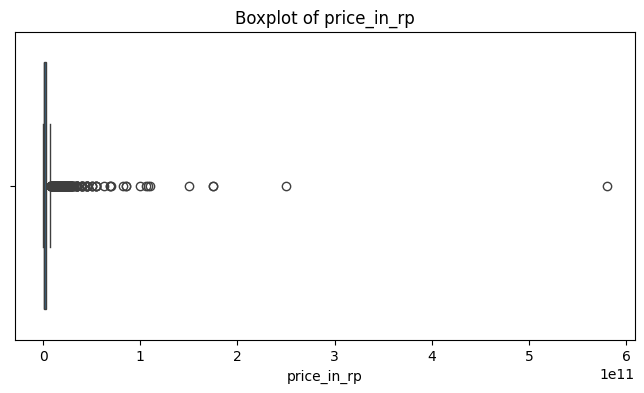

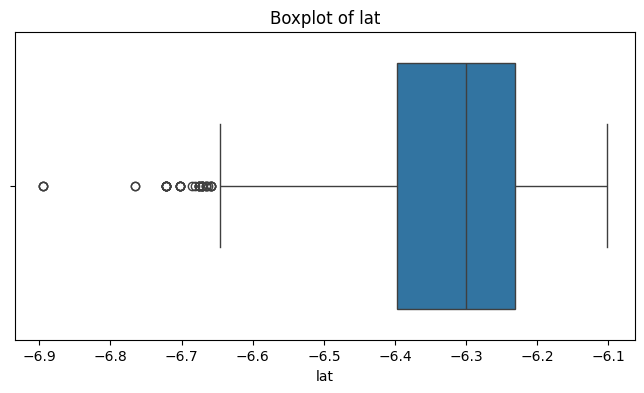

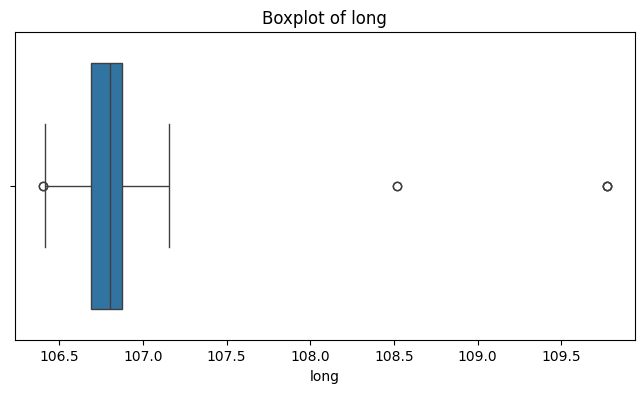

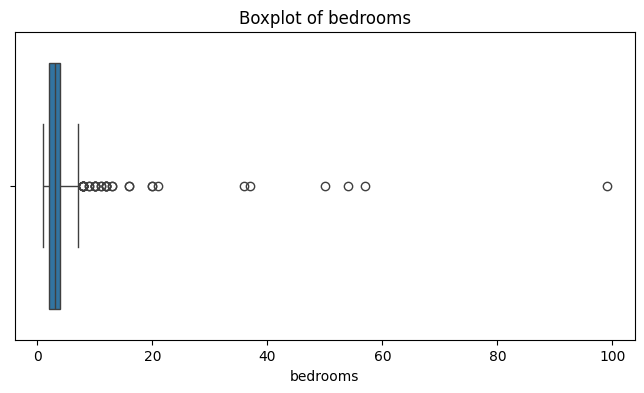

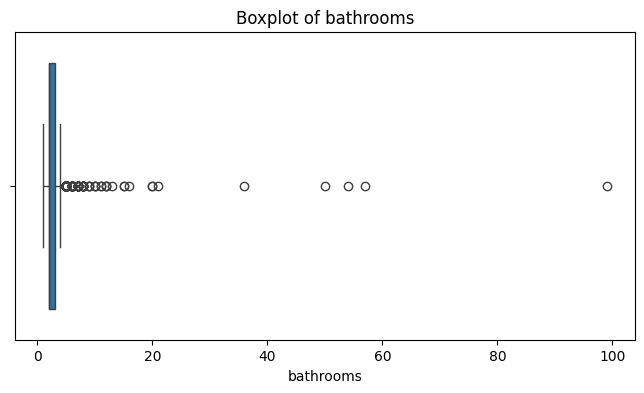

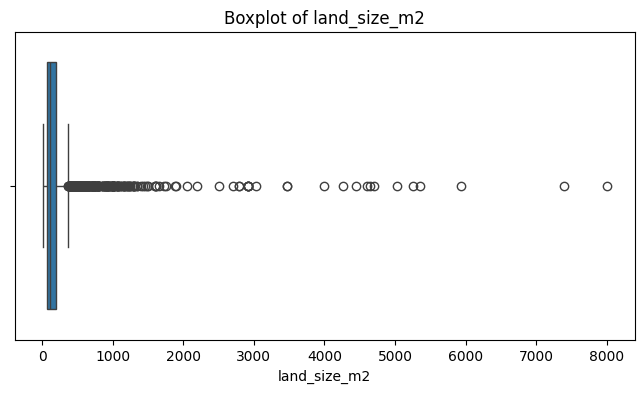

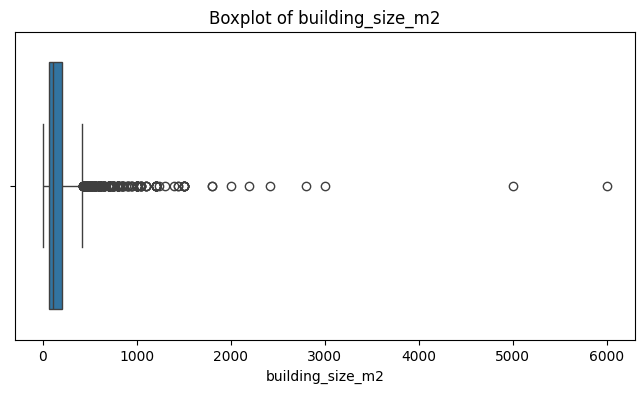

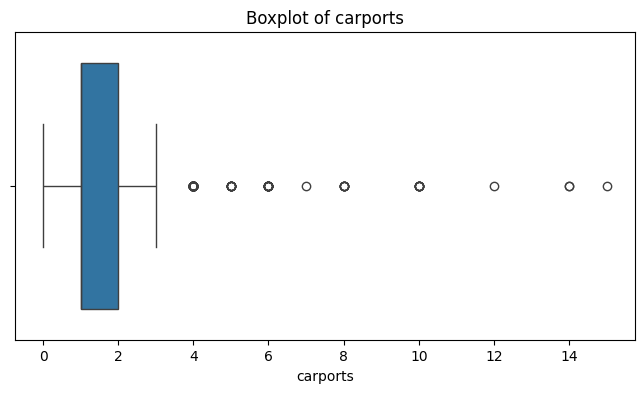

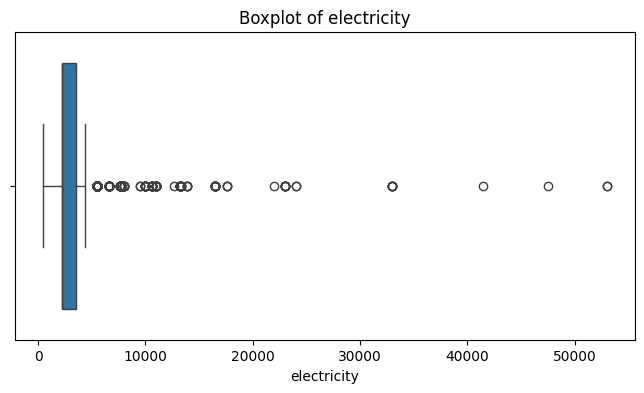

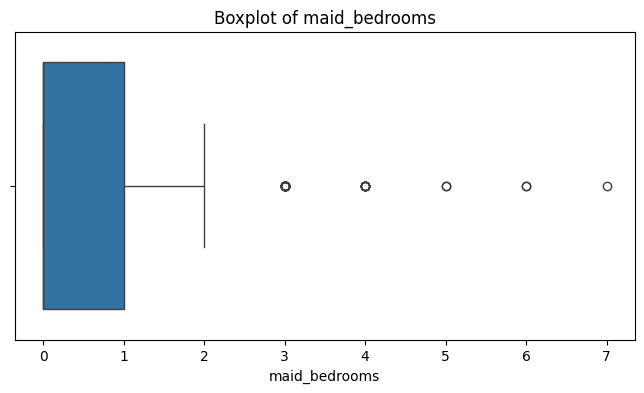

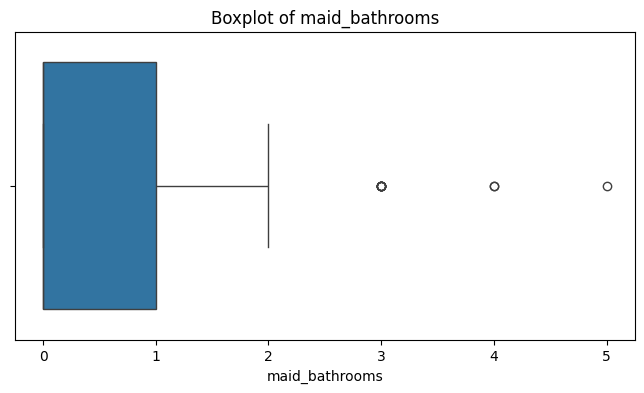

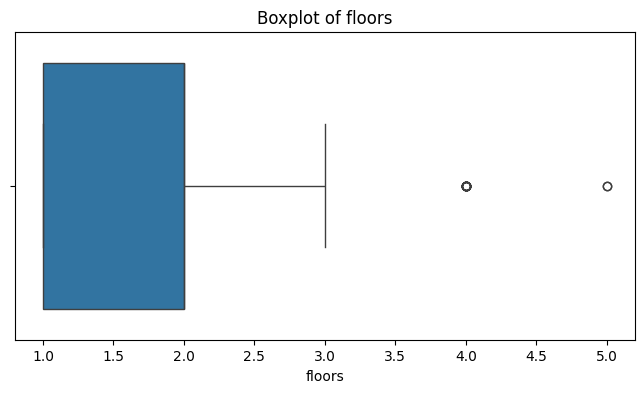

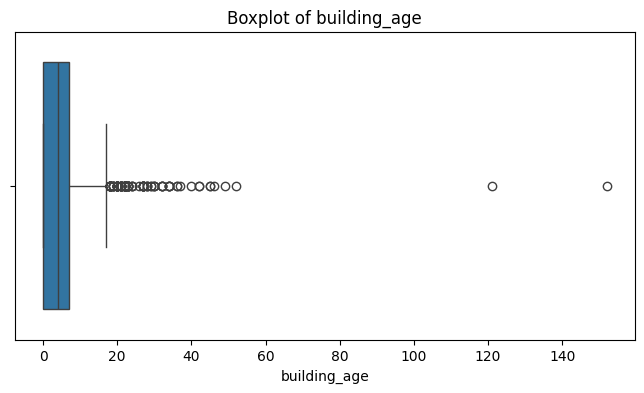

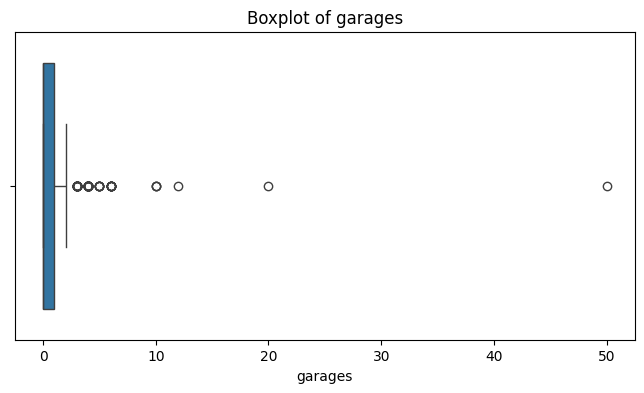

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to create box plots for
numerical_cols = [
    'price_in_rp', 'lat', 'long', 'bedrooms', 'bathrooms', 'land_size_m2',
    'building_size_m2', 'carports', 'electricity', 'maid_bedrooms',
    'maid_bathrooms', 'floors', 'building_age', 'garages'
]

# Create a box plot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4)) # Adjust figure size for better readability
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

**Key Findings dari Boxplot (sebelum dipotong outliernya):**

- **price_in_rp:** Terdapat banyak outlier dengan nilai yang sangat tinggi. Distribusi harga sangat miring, menunjukkan sebagian besar properti memiliki harga di bawah rata-rata, sementara ada segelintir properti dengan harga sangat mahal.
- **lat & long:** Sebagian besar data latitude dan longitude terkonsentrasi di sekitar median, tetapi ada beberapa outlier yang lumayan jauh dari median.
- **bedrooms & bathrooms:** Terdapat outlier yang signifikan dengan jumlah kamar tidur dan kamar mandi yang sangat tinggi (misalnya 99).
- **land_size_m2 & building_size_m2:** Kedua kolom ini menunjukkan adanya outlier dengan ukuran tanah dan bangunan yang sangat besar, jauh di atas sebagian besar properti lainnya. Ini bisa jadi properti komersial atau properti mewah dengan lahan luas.
- **carports & garages:** Mirip dengan kamar tidur/mandi, ada outlier dengan jumlah carport dan garasi yang sangat banyak, yang mungkin mengindikasikan data tidak valid atau ada pengecualian.
- **electricity:** Ada beberapa nilai outlier yang sangat tinggi untuk kapasitas listrik, menunjukkan properti dengan kebutuhan daya yang jauh lebih besar dari rata-rata.
- **maid_bedrooms & maid_bathrooms:** Meskipun sebagian besar properti tidak memiliki kamar/kamar mandi pembantu (nilai 0), ada outlier dengan jumlah kamar/kamar mandi pembantu yang lebih dari rata-rata.
- **floors:** Distribusi jumlah lantai terlihat lebih terkonsentrasi, dengan beberapa outlier kecil pada jumlah lantai yang lebih tinggi seperti 4 hingga 5 lantai.
- **building_age:** Terdapat outlier dengan usia bangunan yang sangat tua jauh dari sebagian besar properti dalam dataset.

Berikut adalah variabel-variabel yang akan dilakukan capping/pemotongan pada outlier ekstrem, dengan pertimbangan untuk tetap mempertahankan sebagian besar data dan hanya menghilangkan nilai yang sangat tidak biasa:

- **price_in_rp:** Kolom ini memiliki outlier yang sangat ekstrem di sisi atas. Dengan harga maksimum mencapai 580 miliar, nilai-nilai ini jelas jauh dari sebagian besar data. Capping bisa dilakukan pada nilai di sekitar puluhan miliar Rupiah.
- **bedrooms & bathrooms:** Adanya nilai 99 kamar tidur/kamar mandi sangat jelas merupakan outlier yang tidak valid.
- **land_size_m2 & building_size_m2:** Kedua kolom ini juga punya outlier yang sangat besar. Ukuran tanah 8000 m2 atau bangunan 6000 m2 sangat tidak umum untuk rumah tinggal biasa di perkotaan. Capping bisa dilakukan pada nilai beberapa ratus atau seribu meter persegi.
- **carports & garages:** Jumlah carport/garasi yang mencapai 15 atau bahkan 50 juga terlihat tidak realistis untuk sebagian besar properti.
- **electricity:** Outlier pada kapasitas listrik (misalnya 53000) juga menunjukkan properti dengan kebutuhan daya yang sangat tinggi.
- **building_age:** Usia bangunan 152 tahun mungkin valid atau tidak, tetapi bisa dianggap outlier dalam konteks pasar properti Jabodetabek yang cenderung lebih ke bangunan tidak setua itu, apalagi Indonesia baru merdeka di tahun 1945.

Untuk variabel lat, long, maid_bedrooms, maid_bathrooms, dan floors, meskipun ada outlier, nilainya tidak seekstrem variabel di atas dan mungkin masih dalam rentang yang wajar atau merepresentasikan kondisi yang ada.

**Capping Outlier: price_in_rp**

Kita akan memotong nilai price_in_rp yang sangat tinggi. Berdasarkan observasi sebelumnya, ada harga yang mencapai ratusan miliar, yang jauh dari sebagian besar data. Akan potong di angka 50 miliar.

In [245]:
# Capping 'price_in_rp' at 50 billion
initial_rows = df.shape[0]
df = df[df['price_in_rp'] <= 5e10]  # 50 miliar
rows_after_capping = df.shape[0]

print(f"Jumlah baris sebelum capping 'price_in_rp': {initial_rows}")
print(f"Jumlah baris setelah capping 'price_in_rp': {rows_after_capping}")
print(f"Jumlah baris yang dihapus: {initial_rows - rows_after_capping}")

Jumlah baris sebelum capping 'price_in_rp': 3553
Jumlah baris setelah capping 'price_in_rp': 3533
Jumlah baris yang dihapus: 20


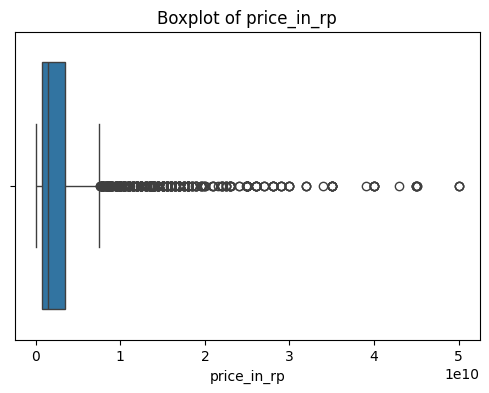

In [246]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price_in_rp'])
plt.title('Boxplot of price_in_rp')
plt.xlabel('price_in_rp')
plt.show()

Setelah nilai di atas 50 miliar Rupiah dihapus, boxplot price_in_rp menunjukkan bahwa outlier ekstrem yang sangat jauh sudah berkurang signifikan. Namun, masih terlihat banyak outlier dengan nilai yang relatif tinggi dibandingkan median, menunjukkan distribusi harga yang tetap miring skewed. Sebagian besar properti terkonsentrasi pada rentang harga yang lebih rendah.

**Capping Outlier: bedrooms**

Untuk mnangani outlier pada kolom bedrooms, terutama nilai yang tidak realistis seperti 99. Kita akan memotong nilai yang dianggap terlalu tinggi dan tidak umum untuk rumah tinggal. Misalnya, kita potong di atas 10 kamar tidur.

In [247]:
# Capping 'bedrooms' at 10
initial_rows = df.shape[0]
df = df[df['bedrooms'] <= 10]
rows_after_capping = df.shape[0]

print(f"Jumlah baris sebelum capping 'bedrooms': {initial_rows}")
print(f"Jumlah baris setelah capping 'bedrooms': {rows_after_capping}")
print(f"Jumlah baris yang dihapus: {initial_rows - rows_after_capping}")

Jumlah baris sebelum capping 'bedrooms': 3533
Jumlah baris setelah capping 'bedrooms': 3515
Jumlah baris yang dihapus: 18


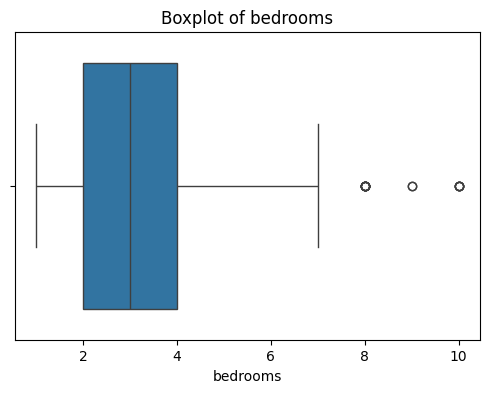

In [248]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bedrooms'])
plt.title('Boxplot of bedrooms')
plt.xlabel('bedrooms')
plt.show()

Setelah outlier ekstrem di atas 10 kamar tidur dihapus, boxplot bedrooms menunjukkan distribusi jumlah kamar tidur yang lebih berkonsentrasi. Mayoritas properti memiliki 2 hingga 4 kamar tidur. Masih ada beberapa outlier dengan jumlah kamar tidur antara 5 hingga 10, tetapi nilainya tidak seekstrem sebelumnya (misalnya 99). Karena masih masuk akal rumah punya 10 kamar tidur.

**Capping Outlier: bathrooms**

Mirip dengan bedrooms, kita akan memotong nilai outlier ekstrem pada kolom bathrooms, seperti nilai 99, dan nilai lain yang dianggap terlalu tinggi. Kita coba potong di atas 10 kamar mandi.

In [249]:
# Capping 'bathrooms' at 10
initial_rows = df.shape[0]
df = df[df['bathrooms'] <= 10]
rows_after_capping = df.shape[0]

print(f"Jumlah baris sebelum capping 'bathrooms': {initial_rows}")
print(f"Jumlah baris setelah capping 'bathrooms': {rows_after_capping}")
print(f"Jumlah baris yang dihapus: {initial_rows - rows_after_capping}")

Jumlah baris sebelum capping 'bathrooms': 3515
Jumlah baris setelah capping 'bathrooms': 3513
Jumlah baris yang dihapus: 2


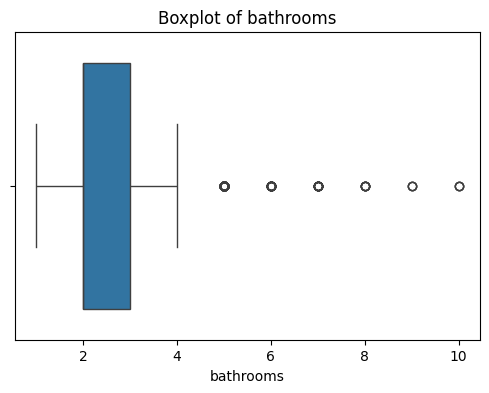

In [250]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot of bathrooms')
plt.xlabel('bathrooms')
plt.show()

Setelah outlier ekstrem di atas 10 kamar mandi dihapus, boxplot bathrooms menunjukkan distribusi jumlah kamar mandi yang lebih terkonsentrasi. Sebagian besar properti memiliki 2 atau 3 kamar mandi. Masih ada beberapa outlier dengan jumlah kamar mandi antara 4 hingga 10.

**Capping Outlier: land_size_m2**

Untuk land_size_m2, ada outlier dengan luas tanah ribuan meter persegi. Kita akan potong nilai yang dianggap terlalu besar untuk properti hunian biasa. Kita coba potong di atas 1500 m2 agar banyak data yang masih bertahan juga.

In [251]:
# Capping 'land_size_m2' at 1500 m2
initial_rows = df.shape[0]
df = df[df['land_size_m2'] <= 1500]
rows_after_capping = df.shape[0]

print(f"Jumlah baris sebelum capping 'land_size_m2': {initial_rows}")
print(f"Jumlah baris setelah capping 'land_size_m2': {rows_after_capping}")
print(f"Jumlah baris yang dihapus: {initial_rows - rows_after_capping}")

Jumlah baris sebelum capping 'land_size_m2': 3513
Jumlah baris setelah capping 'land_size_m2': 3488
Jumlah baris yang dihapus: 25


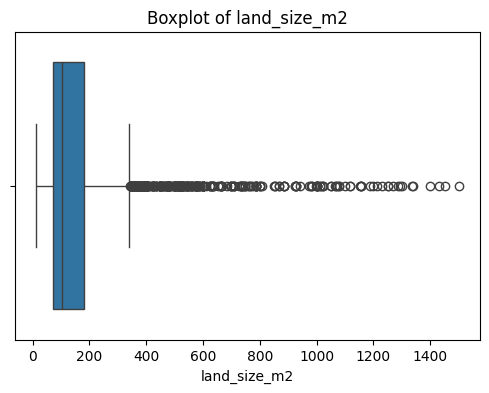

In [252]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['land_size_m2'])
plt.title('Boxplot of land_size_m2')
plt.xlabel('land_size_m2')
plt.show()

Setelah outlier ekstrem di atas 1500 m2 dihapus, boxplot land_size_m2 menunjukkan distribusi luas tanah yang lebih terkonsentrasi. Mayoritas properti memiliki luas tanah di bawah 200 m2. Masih ada outlier dengan luas tanah antara sekitar 400 m2 hingga 1500 m2 tapi sudah lebih terkonsentrasi daripada sebelum dicap.

**Capping Outlier: building_size_m2**

Sama halnya dengan land_size_m2, kolom building_size_m2 juga memiliki outlier sangat besar. Kita akan potong nilai yang dianggap terlalu besar. Kita coba potong di atas 1500 m2 agar beberapa data masih tersimpan.

In [253]:
# Capping 'building_size_m2' at 1500 m2
initial_rows = df.shape[0]
df = df[df['building_size_m2'] <= 1500]
rows_after_capping = df.shape[0]

print(f"Jumlah baris sebelum capping 'building_size_m2': {initial_rows}")
print(f"Jumlah baris setelah capping 'building_size_m2': {rows_after_capping}")
print(f"Jumlah baris yang dihapus: {initial_rows - rows_after_capping}")

Jumlah baris sebelum capping 'building_size_m2': 3488
Jumlah baris setelah capping 'building_size_m2': 3488
Jumlah baris yang dihapus: 0


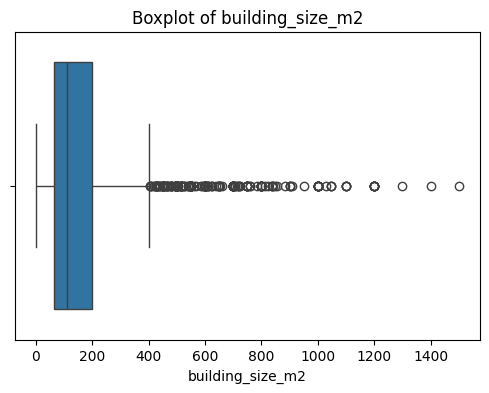

In [254]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['building_size_m2'])
plt.title('Boxplot of building_size_m2')
plt.xlabel('building_size_m2')
plt.show()

Setelah outlier ekstrem di atas 1500 m2 dihapus, boxplot building_size_m2 menunjukkan distribusi luas bangunan yang lebih terkonsentrasi. Mayoritas properti memiliki luas bangunan di bawah 200 m2. Masih ada outlier dengan luas bangunan antara sekitar 400 m2 hingga 1500 m2.

**Capping Outlier: carports**

Untuk jumlah carport, ada outlier yang sangat tinggi. Kita akan memotong nilai yang dianggap tidak realistis. Kita coba potong di atas 5 carport.

In [255]:
# Capping 'carports' at 5
initial_rows = df.shape[0]
df = df[df['carports'] <= 5]
rows_after_capping = df.shape[0]

print(f"Jumlah baris sebelum capping 'carports': {initial_rows}")
print(f"Jumlah baris setelah capping 'carports': {rows_after_capping}")
print(f"Jumlah baris yang dihapus: {initial_rows - rows_after_capping}")

Jumlah baris sebelum capping 'carports': 3488
Jumlah baris setelah capping 'carports': 3471
Jumlah baris yang dihapus: 17


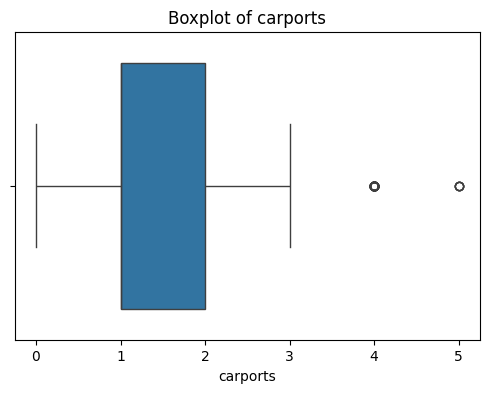

In [256]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['carports'])
plt.title('Boxplot of carports')
plt.xlabel('carports')
plt.show()

Setelah outlier di atas 5 carport dihapus, boxplot carports menunjukkan distribusi yang lebih terkonsentrasi. Mayoritas properti memiliki 1 atau 2 carport. Masih ada beberapa outlier dengan 3 hingga 5 carport.

**Capping Outlier: garages**

Sama halnya dengan carport, kita akan memotong nilai outlier ekstrem pada kolom garages. Kita coba potong di atas 5 garasi.

In [257]:
# Capping 'garages' at 5
initial_rows = df.shape[0]
df = df[df['garages'] <= 5]
rows_after_capping = df.shape[0]

print(f"Jumlah baris sebelum capping 'garages': {initial_rows}")
print(f"Jumlah baris setelah capping 'garages': {rows_after_capping}")
print(f"Jumlah baris yang dihapus: {initial_rows - rows_after_capping}")

Jumlah baris sebelum capping 'garages': 3471
Jumlah baris setelah capping 'garages': 3467
Jumlah baris yang dihapus: 4


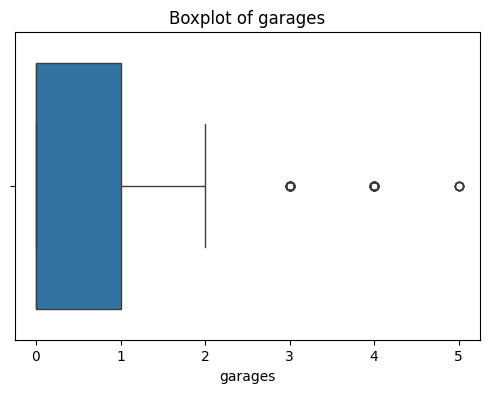

In [258]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['garages'])
plt.title('Boxplot of garages')
plt.xlabel('garages')
plt.show()

Setelah outlier di atas 5 garasi dihapus, boxplot garages menunjukkan distribusi yang lebih terkonsentrasi. Mayoritas properti tidak memiliki garasi (nilai 0) atau memiliki 1 hingga 2 garasi. Masih ada beberapa outlier dengan 3 hingga 5 garasi.

**Capping Outlier: electricity**

Untuk kapasitas listrik, ada outlier yang sangat tinggi. Kita akan memotong nilai yang dianggap tidak umum. Kita coba potong di atas 8500 mah.

In [259]:
# Capping 'electricity' at 8500
initial_rows = df.shape[0]
df = df[df['electricity'] <= 8500]
rows_after_capping = df.shape[0]

print(f"Jumlah baris sebelum capping 'electricity': {initial_rows}")
print(f"Jumlah baris setelah capping 'electricity': {rows_after_capping}")
print(f"Jumlah baris yang dihapus: {initial_rows - rows_after_capping}")

Jumlah baris sebelum capping 'electricity': 3467
Jumlah baris setelah capping 'electricity': 3374
Jumlah baris yang dihapus: 93


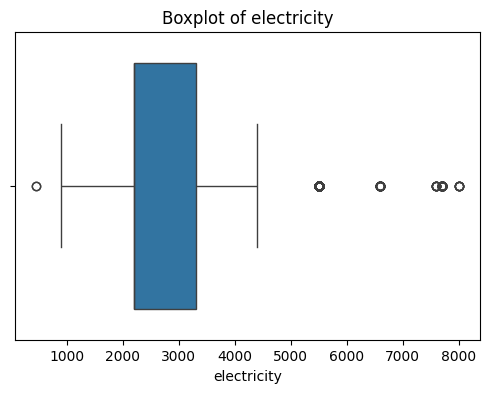

In [260]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['electricity'])
plt.title('Boxplot of electricity')
plt.xlabel('electricity')
plt.show()

Setelah outlier ekstrem di atas 8500 mah dihapus, boxplot electricity menunjukkan distribusi yang lebih terkonsentrasi. Mayoritas properti memiliki kapasitas listrik 2200 atau 3500 mah. Masih ada beberapa outlier dengan kapasitas listrik antara sekitar 4400 mah hingga 8250 mah.

## 5. Feature Engineering:
- Create new feature using binning (if any).


**Binning land_size_m2**

Kita akan membuat fitur baru dengan mengelompokkan luas tanah (land_size_m2) ke dalam beberapa kategori (bin) dengan rentang luas tanah tetap yang spesifik:

*   **Small:** < 100 m2
*   **Medium:** 100 – 300 m2
*   **Large:** 300 – 600 m2
*   **Extra Large:** > 600 m2

Strategi ini menggunakan rentang yang ditentukan secara manual untuk mengelompokkan properti berdasarkan ukuran tanah. Hal ini karena land_size_m2 datanya numerik bervariasi dengan rentang jauh, jadi kita menggunakan ini agar lebih mudah dianalisis.

In [261]:
# Define bin edges for fixed land size ranges
# Use a value slightly above the maximum land size for the last bin
land_size_bins = [0, 100, 300, 600, df['land_size_m2'].max() + 1] # Add +1 to max() to ensure the upper bound is inclusive in the last bin

# Define corresponding labels for the bins
land_size_labels = ['Small', 'Medium', 'Large', 'Extra Large']

# Create a new feature 'land_size_category' using pd.cut()
# right=False means bin [a, b) includes a but not b. This fits the definition: <100, 100-300, etc.
# include_lowest=True ensures the minimum value (0) is included in the first bin.
df['land_size_category'] = pd.cut(df['land_size_m2'], bins=land_size_bins, labels=land_size_labels, right=False, include_lowest=True)

# Display the counts of properties in each category
print("Distribution of properties by land size category (fixed ranges):")
display(df['land_size_category'].value_counts())

# Display the first few rows with the new feature
print("\nDataFrame head with new 'land_size_category' feature:")
display(df.head())

Distribution of properties by land size category (fixed ranges):


,count
land_size_category,
Small,1607
Medium,1401
Large,287
Extra Large,79



DataFrame head with new 'land_size_category' feature:


,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,building_orientation,garages,furnishing,land_size_category
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",4.0,4.0,239.0,272.0,...,4400,0.0,1.0,2.0,5.0,bagus,Unknown,0.0,unfurnished,Medium
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,...,2200,0.0,0.0,2.0,6.0,bagus,Unknown,0.0,unfurnished,Small
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",3.0,3.0,119.0,131.0,...,2200,1.0,1.0,2.0,6.0,bagus,Unknown,1.0,unfurnished,Medium
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",3.0,3.0,180.0,174.0,...,3500,1.0,1.0,2.0,6.0,bagus sekali,utara,2.0,unfurnished,Medium
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",4.0,3.0,328.0,196.0,...,3500,1.0,1.0,2.0,9.0,bagus,utara,1.0,unfurnished,Large


Mayoritas properti berada pada kategori Small dan Medium, yang mencakup lebih dari 80% total data. Jumlah properti menurun drastis pada kategori Large dan Extra Large, sehingga terlihat jelas ada penumpukan data pada lahan berukuran kecil hingga menengah. Hal ini menunjukkan bahwa lahan 0-600 m2 jauh lebih dominan dibandingkan lahan yang lebih besar. Pola distribusi ini menggambarkan pasar perumahan yang lebih banyak bergerak di segmen lahan terbatas. Rentang kategori dipilih demikian karena ada konsentrasi data tinggi pada 0-600 m2 sehingga perlu pemisahan lebih detail di range tersebut agar analisis lebih akurat.

**Binning building_size_m2**

Kita akan membuat fitur baru dengan mengelompokkan luas bangunan (building_size_m2) ke dalam beberapa kategori (bin) dengan rentang luas bangunan tetap yang spesifik:

*   **Small:** < 100 m2
*   **Medium:** 100 – 300 m2
*   **Large:** 300 – 600 m2
*   **Extra Large:** > 600 m2

Strategi ini menggunakan rentang yang ditentukan secara manual untuk mengelompokkan properti berdasarkan ukuran bangunan. Pembagian kelompok ini agar memudahkan analisis karena building_size_m2 memiliki data yang bervariasi.

In [262]:
# Define bin edges for fixed building size ranges
# Use a value slightly above the maximum building size for the last bin
building_size_bins = [0, 100, 300, 600, df['building_size_m2'].max() + 1] # Add +1 to max() to ensure the upper bound is inclusive in the last bin

# Define corresponding labels for the bins
building_size_labels = ['Small', 'Medium', 'Large', 'Extra Large']

# Create a new feature 'building_size_category' using pd.cut()
# right=False means bin [a, b) includes a but not b. This fits the definition: <100, 100-300, etc.
# include_lowest=True ensures the minimum value (0) is included in the first bin.
df['building_size_category'] = pd.cut(df['building_size_m2'], bins=building_size_bins, labels=building_size_labels, right=False, include_lowest=True)

# Display the counts of properties in each category
print("Distribution of properties by building size category (fixed ranges):")
display(df['building_size_category'].value_counts())

# Display the first few rows with the new feature
print("\nDataFrame head with new 'building_size_category' feature:")
display(df.head())

Distribution of properties by building size category (fixed ranges):


,count
building_size_category,
Small,1578
Medium,1362
Large,353
Extra Large,81



DataFrame head with new 'building_size_category' feature:


,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,...,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,building_orientation,garages,furnishing,land_size_category,building_size_category
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",4.0,4.0,239.0,272.0,...,0.0,1.0,2.0,5.0,bagus,Unknown,0.0,unfurnished,Medium,Medium
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,...,0.0,0.0,2.0,6.0,bagus,Unknown,0.0,unfurnished,Small,Small
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",3.0,3.0,119.0,131.0,...,1.0,1.0,2.0,6.0,bagus,Unknown,1.0,unfurnished,Medium,Medium
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",3.0,3.0,180.0,174.0,...,1.0,1.0,2.0,6.0,bagus sekali,utara,2.0,unfurnished,Medium,Medium
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",4.0,3.0,328.0,196.0,...,1.0,1.0,2.0,9.0,bagus,utara,1.0,unfurnished,Large,Medium


Mayoritas properti berada di kategori Small dan Medium, yang bersama-sama mencakup lebih dari 85% total data. Jumlah properti pada kategori Large dan Extra Large jauh lebih sedikit, menunjukkan dominasi bangunan berukuran kecil hingga menengah. Hal ini menegaskan bahwa rumah dengan ukuran bangunan 0-600 m² lebih umum ditemukan di pasar. Distribusi ini juga memperlihatkan keterbatasan rumah berukuran besar yang biasanya masuk segmen premium. Rentang kategori dipilih demikian karena ada penumpukan data di -–600 m² sehingga perlu dibagi lebih detail untuk menghasilkan analisis yang lebih representatif.

**Binning price_in_rp**

Kita akan membuat fitur baru dengan mengelompokkan harga properti (price_in_rp) ke dalam beberapa kategori (bin) dengan rentang harga tetap yang spesifik:

*   **Low:** < Rp 1 miliar
*   **Middle:** Rp 1 miliar - Rp 5 miliar
*   **High:** Rp 5 miliar - Rp 15 miliar
*   **Luxury:** > Rp 15 miliar

Strategi ini menggunakan pengetahuan domain untuk mendefinisikan segmen pasar berdasarkan harga properti. Binning dilakukan agar pengelompokan data numerik yang bervariasi bisa lebih dianalisis.

In [263]:
# Define bin edges for fixed price ranges
# Use a value slightly above the maximum price for the last bin to ensure all data is included
price_bins = [0, 1e9, 5e9, 1.5e10, df['price_in_rp'].max() + 1] # Add +1 to max() to ensure the upper bound is inclusive in the last bin

# Define corresponding labels for the bins
price_labels = ['Low', 'Middle', 'High', 'Luxury']

# Create a new feature 'price_category' using pd.cut()
# right=False means bin [a, b) includes a but not b. This fits the definition: <1B, 1B-5B, etc.
# include_lowest=True ensures the minimum value (0) is included in the first bin.
df['price_category'] = pd.cut(df['price_in_rp'], bins=price_bins, labels=price_labels, right=False, include_lowest=True)

# Display the counts of properties in each category
print("Distribution of properties by price category (fixed ranges):")
display(df['price_category'].value_counts())

# Display the first few rows with the new feature
print("\nDataFrame head with new 'price_category' feature:")
display(df.head())

Distribution of properties by price category (fixed ranges):


,count
price_category,
Middle,1729
Low,1187
High,368
Luxury,90



DataFrame head with new 'price_category' feature:


,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,...,maid_bathrooms,floors,building_age,property_condition,building_orientation,garages,furnishing,land_size_category,building_size_category,price_category
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",4.0,4.0,239.0,272.0,...,1.0,2.0,5.0,bagus,Unknown,0.0,unfurnished,Medium,Medium,Middle
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,...,0.0,2.0,6.0,bagus,Unknown,0.0,unfurnished,Small,Small,Middle
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",3.0,3.0,119.0,131.0,...,1.0,2.0,6.0,bagus,Unknown,1.0,unfurnished,Medium,Medium,Middle
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",3.0,3.0,180.0,174.0,...,1.0,2.0,6.0,bagus sekali,utara,2.0,unfurnished,Medium,Medium,Middle
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",4.0,3.0,328.0,196.0,...,1.0,2.0,9.0,bagus,utara,1.0,unfurnished,Large,Medium,Middle


Mayoritas properti berada pada kategori Middle dan Low, yang mencakup lebih dari 85% total data. Sementara itu, kategori High dan Luxury jumlahnya jauh lebih sedikit, menunjukkan bahwa pasar properti lebih banyak bergerak di segmen harga terjangkau hingga menengah. Distribusi ini menandakan bahwa rumah dengan harga di bawah 15 miliar mendominasi penawaran. Pola ini mencerminkan daya beli masyarakat yang lebih besar pada segmen menengah ke bawah. Rentang kategori dipilih karena terdapat penumpukan data pada harga Rp1-5 miliar dan di bawah Rp1 miliar, sehingga perlu dibedakan lebih detail untuk memahami pasar secara lebih tepat.

**Binning building_age**

Kita akan membuat fitur baru dengan mengelompokkan usia bangunan (building_age) ke dalam beberapa kategori (bin) dengan rentang tahun tetap yang spesifik:

*   **New:** 0 - 5 tahun
*   **Relatively New:** 6 - 15 tahun
*   **Old:** 16 - 30 tahun
*   **Very Old:** > 30 tahun

Strategi ini menggunakan rentang yang ditentukan secara manual untuk mengelompokkan properti berdasarkan usia bangunan. Karena umur bangunan yang beragam, pengelompokan ini juga memudahkan untuk analisis.

In [264]:
# Define bin edges for fixed building age ranges
# Use a value slightly above the maximum building age for the last bin
building_age_bins = [0, 6, 16, 31, df['building_age'].max() + 1] # Using +1 for upper bounds to match inclusive ranges like 6-15, 16-30

# Define corresponding labels for the bins
building_age_labels = ['New', 'Relatively New', 'Old', 'Very Old']

# Create a new feature 'building_age_category' using pd.cut()
# right=False means bin [a, b) includes a but not b
# include_lowest=True ensures the minimum value (0) is included in the first bin.
df['building_age_category'] = pd.cut(df['building_age'], bins=building_age_bins, labels=building_age_labels, right=False, include_lowest=True)

# Display the counts of properties in each category
print("Distribution of properties by building age category (fixed ranges):")
display(df['building_age_category'].value_counts().sort_index())

# Display the first few rows with the new feature
print("\nDataFrame head with new 'building_age_category' feature:")
display(df.head())

Distribution of properties by building age category (fixed ranges):


,count
building_age_category,
New,2063
Relatively New,1141
Old,153
Very Old,17



DataFrame head with new 'building_age_category' feature:


,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,...,floors,building_age,property_condition,building_orientation,garages,furnishing,land_size_category,building_size_category,price_category,building_age_category
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",4.0,4.0,239.0,272.0,...,2.0,5.0,bagus,Unknown,0.0,unfurnished,Medium,Medium,Middle,New
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,...,2.0,6.0,bagus,Unknown,0.0,unfurnished,Small,Small,Middle,Relatively New
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",3.0,3.0,119.0,131.0,...,2.0,6.0,bagus,Unknown,1.0,unfurnished,Medium,Medium,Middle,Relatively New
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",3.0,3.0,180.0,174.0,...,2.0,6.0,bagus sekali,utara,2.0,unfurnished,Medium,Medium,Middle,Relatively New
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",4.0,3.0,328.0,196.0,...,2.0,9.0,bagus,utara,1.0,unfurnished,Large,Medium,Middle,Relatively New


Mayoritas properti termasuk kategori New dan Relatively New, yang mencakup lebih dari 90% total data. Sementara itu, kategori Old dan Very Old jumlahnya sangat sedikit, menunjukkan bahwa properti tua jarang ditawarkan di pasar. Hal ini menegaskan bahwa pasar didominasi rumah yang masih baru hingga relatif baru, sesuai dengan tren pembangunan perumahan modern. Distribusi ini juga mencerminkan preferensi masyarakat terhadap hunian dengan usia bangunan lebih muda. Rentang kategori dipilih karena terlihat penumpukan data pada usia bangunan 0-15 tahun sehingga perlu dibagi lebih detail untuk analisis yang lebih akurat.

# Part B - Exploratory Data Analysis (EDA)


- Conduct at least 5 analyses using visualizations (e.g., histogram, barplot, boxplot,
scatterplot, heatmap, etc).
Each visualization must be accompanied by a key finding/insight relevant to the
dataset.



**1. Analisis Distribusi Harga (price_in_rp)**

Kita akan melihat distribusi harga properti menggunakan histogram untuk memahami sebaran harga secara keseluruhan.

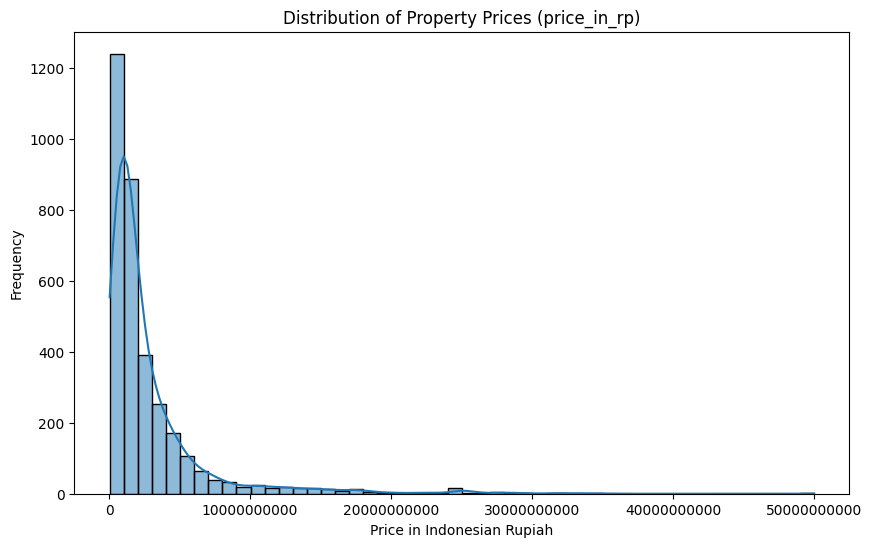

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price_in_rp'], kde=True, bins=50) # bins bisa disesuaikan
plt.title('Distribution of Property Prices (price_in_rp)')
plt.xlabel('Price in Indonesian Rupiah')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x') # Optional: prevent scientific notation
plt.show()

Jistogram menunjukkan bahwa distribusi harga properti sangat miring ke kanan (right-skewed). Mayoritas properti memiliki harga terkonsentrasi pada rentang yang lebih rendah, sementara ada sejumlah kecil properti mewah dengan harga yang jauh lebih tinggi, membentuk ekor panjang pada histogram. Mayoritas pasar properti berada di segmen harga rendah hingga menengah, jadi fokus bisnis utama harus disesuaikan untuk melayani segmen ini secara efisien. Sementara itu, segmen mewah yang lebih kecil memerlukan strategi pemasaran dan penanganan yang sangat berbeda dan lebih terfokus.

**2. Analisis Harga Berdasarkan Lokasi (lat, long, city)**

Kita akan memvisualisasikan harga properti berdasarkan koordinat geografis (latitude dan longitude), dan mewarnai titik-titik berdasarkan kota untuk melihat apakah ada pola harga berdasarkan lokasi geografis.

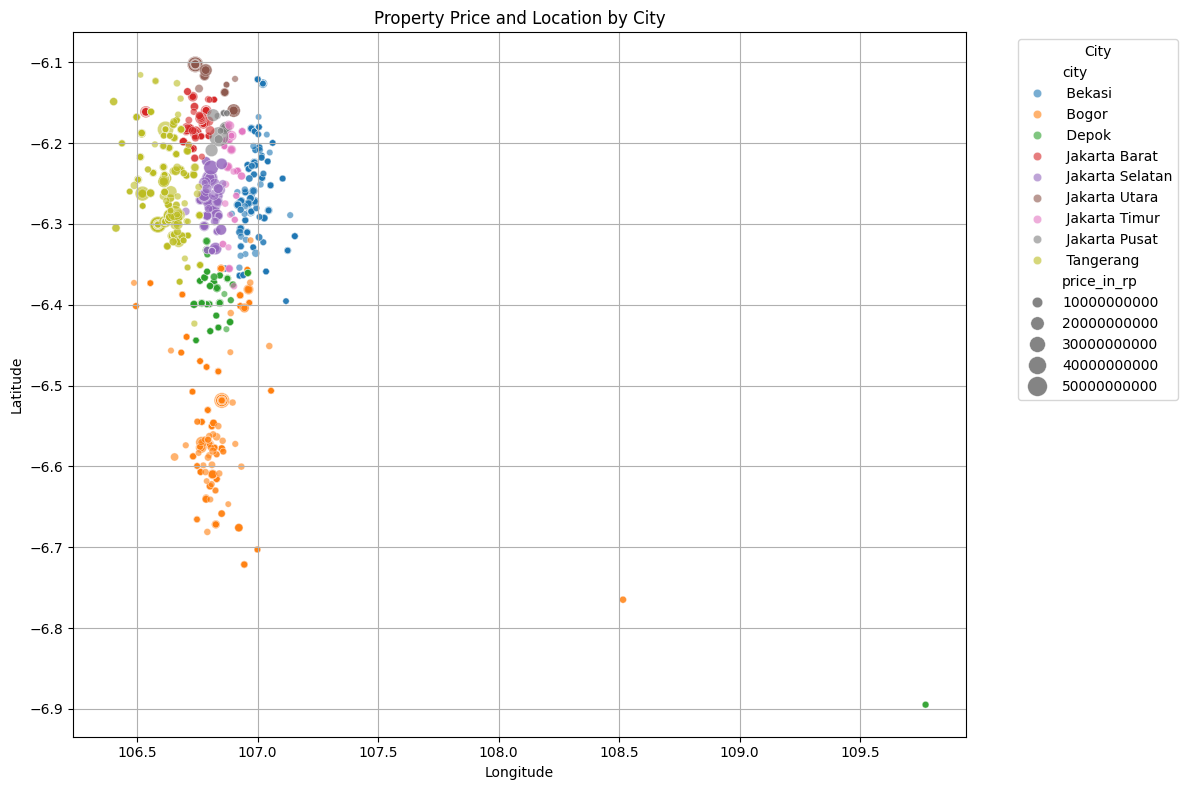

In [266]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['city'], size=df['price_in_rp'], sizes=(20, 200), alpha=0.6)
plt.title('Property Price and Location by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Visualisasi scatter plot harga properti berdasarkan koordinat geografis dan diwarnai per kota menunjukkan adanya pola harga yang jelas terkait lokasi. Kota-kota tertentu (misalnya Jakarta Selatan) cenderung memiliki properti dengan harga yang secara signifikan lebih tinggi dibandingkan kota-kota lain di Jabodetabek, meskipun masih ada properti mahal di semua area. Ini menegaskan bahwa lokasi geografis (terutama kedekatan dengan pusat kota atau area premium) adalah faktor penentu utama harga properti. Bagi pengembang atau agen properti, fokus dan strategi pemasaran harus disesuaikan secara spesifik per lokasi (kota atau bahkan distrik). Properti di area premium (misalnya Jakarta Selatan) memerlukan pendekatan pemasaran dan penetapan harga yang berbeda dibandingkan area misalnya Bekasi atau Bogor.

**3. Analisis Karakteristik Rumah dengan Harga**

Kita akan mengeksplorasi hubungan antara karakteristik utama rumah (seperti luas tanah dan luas bangunan) dengan harga properti menggunakan scatter plot.

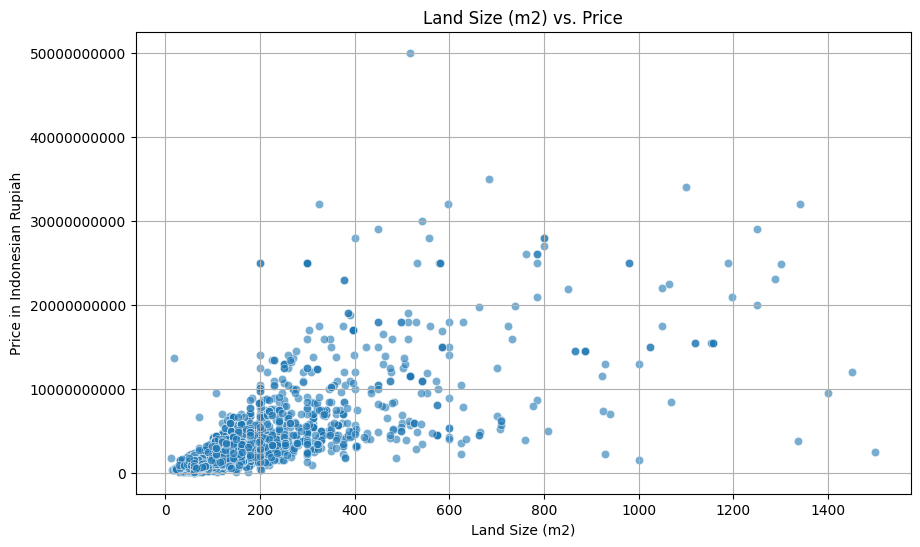

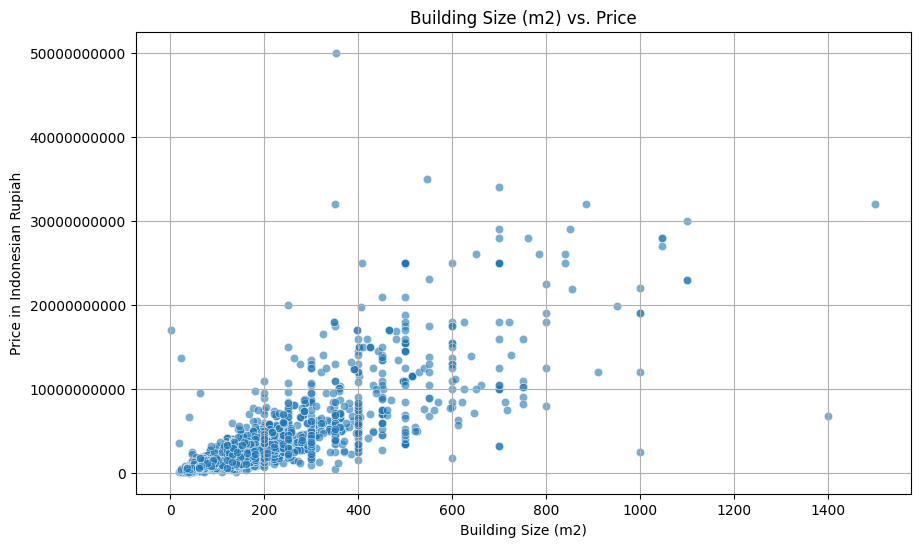

In [267]:
# Scatter plot: Land Size vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['land_size_m2'], y=df['price_in_rp'], alpha=0.6)
plt.title('Land Size (m2) vs. Price')
plt.xlabel('Land Size (m2)')
plt.ylabel('Price in Indonesian Rupiah')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

# Scatter plot: Building Size vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['building_size_m2'], y=df['price_in_rp'], alpha=0.6)
plt.title('Building Size (m2) vs. Price')
plt.xlabel('Building Size (m2)')
plt.ylabel('Price in Indonesian Rupiah')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

Scatter plot menunjukkan adanya tren positif yang jelas antara karakteristik rumah (luas tanah dan luas bangunan) dengan harga properti. Secara umum, properti dengan luas tanah dan bangunan yang lebih besar, cenderung memiliki harga yang lebih tinggi. Ini mengkonfirmasi bahwa ukuran properti adalah faktor penting dalam menentukan nilainya di pasar. Bagi pengembang, memahami luas bangunan yang diminati di segmen pasar target sangat krusial untuk perencanaan proyek yang sukses. Data ini juga bisa digunakan untuk memprediksi harga properti berdasarkan spesifikasi fisiknya.

**4. Analisis kondisi properti vs Harga**

Kita akan menganalisis dalam bentuk boxplot bagaimana fitur-fitur kategorikal seperti property condition memengaruhi harga.

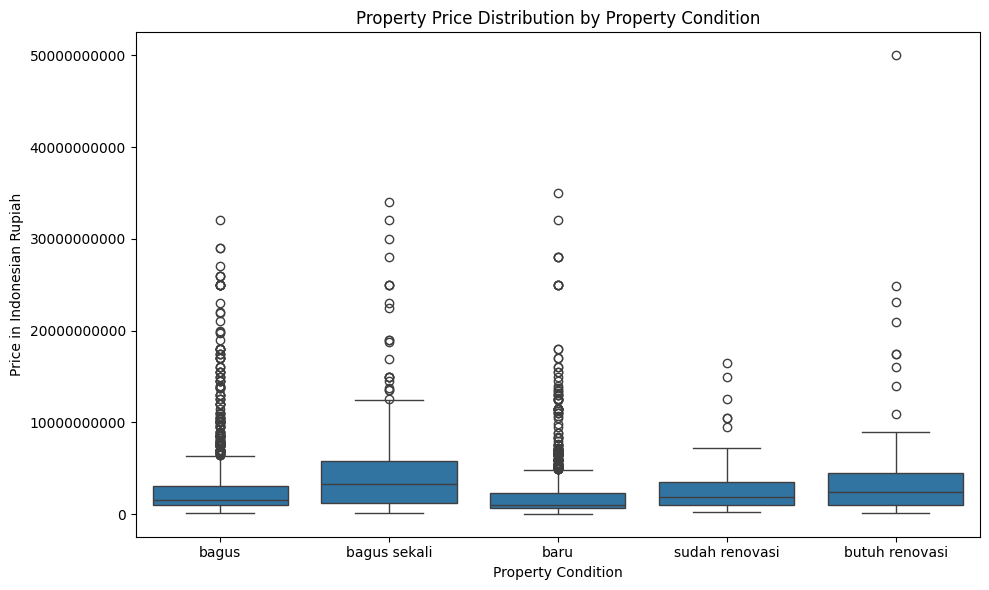

In [268]:
# Box plot: Property Condition vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['property_condition'], y=df['price_in_rp'])
plt.title('Property Price Distribution by Property Condition')
plt.xlabel('Property Condition')
plt.ylabel('Price in Indonesian Rupiah')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Ada kecenderungan properti dengan kondisi "bagus sekali" memiliki median harga yang lebih tinggi dibandingkan kondisi lainnya. Bagi agen atau penjual, mengetahui kategori properti membantu dalam menetapkan harga yang realistis dan sesuai dengan pasar. Menekankan keunggulan kategori properti (misalnya "kondisi bagus sekali", "bangunan baru") dalam iklan dapat menarik pembeli yang mencari kriteria tersebut.

**5. Analisis Korelasi (Heatmap)**

Terakhir, kita akan membuat heatmap dari matriks korelasi antar variabel numerik. Ini membantu kita melihat hubungan linear antara setiap pasangan variabel numerik secara visual.

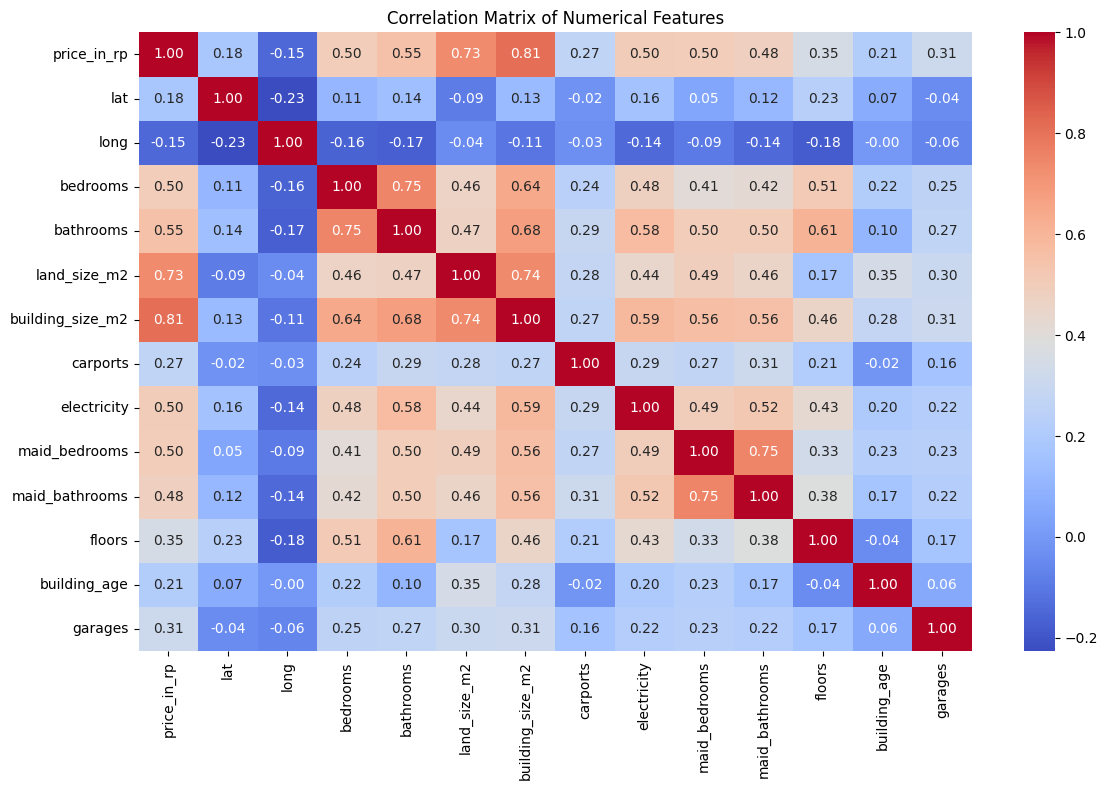

In [269]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

Heatmap korelasi menunjukkan adanya hubungan linear yang kuat antara beberapa variabel numerik. Terlihat korelasi positif yang kuat antara price_in_rp dengan land_size_m2 dan building_size_m2, serta dengan jumlah bedrooms dan bathrooms. Fitur-fitur ukuran properti (land_size_m2, building_size_m2, bedrooms, bathrooms) juga saling berkorelasi positif. Korelasi lainnya umumnya lebih lemah, meskipun ada beberapa korelasi moderat (misalnya antara electricity dengan beberapa fitur ukuran/jumlah kamar).

Korelasi yang kuat antara harga dan fitur ukuran menegaskan kembali bahwa ukuran properti adalah faktor kunci harga. Dalam memprediksi harga atau menilai properti, fitur-fitur ini harus menjadi prioritas utama. Bagi pengembang, ini mendukung keputusan untuk membangun properti dengan ukuran yang diminati pasar. Bagi agen, pemahaman korelasi membantu dalam menjelaskan faktor-faktor yang memengaruhi harga kepada klien. Korelasi antar fitur ukuran juga relevan untuk perencanaan tata letak properti (misalnya, rumah dengan luas bangunan besar cenderung memiliki lebih banyak kamar tidur/mandi).

**6. Sebaran Usia Bangunan (building_age_category)**

Kita akan melihat distribusi properti berdasarkan kategori usia bangunan menggunakan bar plot.

/tmp/ipython-input-3393472458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['building_age_category'], order=df['building_age_category'].value_counts().index, palette='viridis')


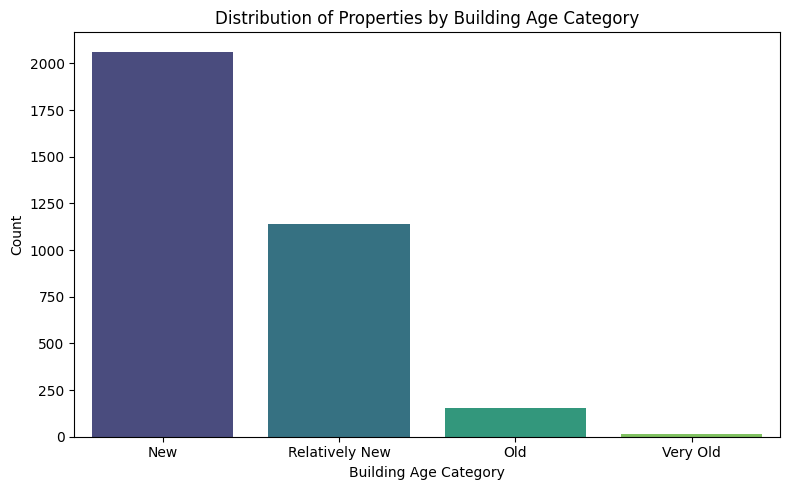

In [270]:
# Bar plot for building_age_category
plt.figure(figsize=(8, 5))
sns.countplot(x=df['building_age_category'], order=df['building_age_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Properties by Building Age Category')
plt.xlabel('Building Age Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Bar plot distribusi kategori usia bangunan menunjukkan bahwa mayoritas properti dalam dataset termasuk dalam kategori "New" (0-5 tahun) dan "Relatively New" (6-15 tahun). Jumlah properti menurun drastis pada kategori "Old" (16-30 tahun) dan "Very Old" (> 30 tahun). Ini mengindikasikan bahwa listing properti di Jabodetabek didominasi oleh hunian yang masih baru hingga relatif baru. Dominasi properti baru/relatif baru menunjukkan bahwa permintaan pasar mungkin lebih tinggi untuk tipe hunian ini. Pengembang bisa fokus pada pembangunan properti dengan usia bangunan muda. Paham akan tren usia bangunan ini membantu dalam mengelola ekspektasi penjual properti tua dan menyesuaikan strategi pemasaran untuk menarik pembeli yang mungkin mencari properti yang lebih mapan atau berpotensi direnovasi.

**Kesimpulan:**

Melalui serangkaian langkah preprocessing data, mulai dari penanganan missing values menggunakan berbagai strategi seperti median, modus, pengisian dengan label 'Unknown', hingga imputasi berbasis regresi untuk `building_age`, dataset telah berhasil diproses untuk analisis lebih lanjut. Penanganan outlier ekstrem melalui capping pada kolom-kolom sambil tetap mempertahankan sebagian besar data yang relevan. Proses feature engineering melalui binning pada harga, luas tanah, luas bangunan, dan usia bangunan berhasil menciptakan kategori-kategori yang relevan dan mudah diinterpretasikan, mengungkap pola dominasi properti di segmen harga dan ukuran tertentu, serta kecenderungan pasar terhadap bangunan yang lebih baru. Visualisasi data (EDA) yang dilakukan berperan penting untuk memperoleh informasi yang sangat berguna untuk pengambilan keputusan bisnis terkait pemasaran, pengembangan, dan investasi properti di wilayah tersebut.

Jevon Ivander K / 0706022310028